In [342]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [433]:
import hashlib
import itertools
import json
import os
from six.moves import urllib
import sys

from tqdm import tqdm

from PIL import Image, ImageColor, ImageFont, ImageDraw, ImageFilter
import random

def LetterRange(start, end):
    return list(map(chr, range(ord(start), ord(end) + 1)))

VOCAB = LetterRange('a', 'z') + LetterRange('A', 'Z') + LetterRange('0', '9')
file_ids = [''.join(i) for i in itertools.product(VOCAB, repeat=4)]
file_index = {f: i for (i, f) in enumerate(file_ids)}

In [434]:
len(file_ids)

14776336

In [35]:
#############
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [12]:
class AttrDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

In [13]:
def defice_cfg_text_gen():
    cfg = AttrDict()

In [243]:
FONTS = '/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/fonts/latin/'
BGS = '/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/pictures/'

fonts = [os.path.join(FONTS, font) for font in\
         os.listdir(FONTS)]

bgs = [os.path.join(BGS, bg) for bg in\
         os.listdir(BGS)]

In [301]:
def defice_cfg_text_gen():
    cfg = AttrDict()
    cfg.fonts = fonts
    cfg.dict = lines
    cfg.bgs = bgs
    cfg.fs = [n for n in range(15,50,3)]
    return cfg

kernel = np.ones((5,5),np.float32)/25

In [302]:
cfg_gen = defice_cfg_text_gen()

In [412]:
def generate_horizontal_text(text, font, text_color, font_size, space_width):
        image_font = ImageFont.truetype(font=font, size=font_size)
        
        words = text.split(' ')
        
        space_width = image_font.getsize(' ')[0] * space_width

        words_width = [image_font.getsize(w)[0] for w in words]
        text_width =  sum(words_width) + int(space_width) * (len(words) - 1)
        text_height = max([image_font.getsize(w)[1] for w in words])

        roll = np.random.random()
        if roll > 0.77:
            txt_img = Image.open(random.choice(cfg_gen.bgs))
            h, w = txt_img.size
            xs, ys = np.random.randint(h-text_width), np.random.randint(w-text_height)
            txt_img = txt_img.crop((xs, ys, xs+text_width, ys+text_height))
        else:
            txt_img = Image.new('RGB', (text_width, text_height), (255, 255, 255))
        # print(txt_img.size)

        txt_draw = ImageDraw.Draw(txt_img)

        colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
        c1, c2 = colors[0], colors[-1]

        fill = (
            random.randint(c1[0], c2[0]),
            random.randint(c1[1], c2[1]),
            random.randint(c1[2], c2[2])
        )

        for i, w in enumerate(words):
            txt_draw.text((sum(words_width[0:i]) + i * int(space_width), 0), w, fill=fill, font=image_font)

        return txt_img

In [423]:
images = []
for idx, word in tqdm(enumerate(d[:100])):
    roll = np.random.random()
    font = random.choice(cfg_gen.fonts)
    fs = random.choice(cfg_gen.fs)
    text = d[idx]
    if len(text) > 13:
        text = text[:13]
    img = generate_horizontal_text(text,
                                   font=font,
                                   font_size=fs,
                                   space_width=1.3,
                                   text_color='black')
    if roll > 0.7:
        img = cv2.filter2D(np.array(img), -1, kernel)
    images.append(img)

100it [00:01, 96.35it/s]


In [424]:
d[10]

'2,4-'

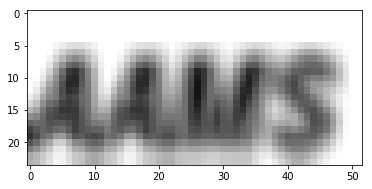

In [427]:
plt.imshow(np.array(images[98]))

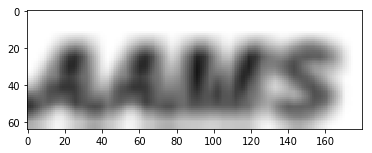

In [425]:
plt.imshow(cv2.resize(np.array(images[98]), (180, 64)))

In [411]:
images[6].save('asd', 'JPEG')

In [426]:
np.array(images[99]).shape

(34, 125, 3)

In [61]:
random.choice(cfg_gen.fonts)

'/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/fonts/latin/CaviarDreams_Italic.ttf'

In [175]:
with open('/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/dicts/en.txt', 'r') as f:
        d = f.readlines()
d = [l[:-2] for l in d]
d = d[1:]

In [176]:
d[:10]

['108',
 '&',
 '10-poin',
 '10t',
 '11-poin',
 '12-poin',
 '16-poin',
 '18-poin',
 '1s',
 '2,4,5-']

In [325]:
alph = ''
for label in d:
    for c in label:
        if c not in alph:
            alph += c

In [324]:
a = 'asd'
'b' in a

False

In [326]:
alph

'108&-point26s,453rG79aA.BCDFMHILPNRSUVwWObechEludqyvkg\'xjfmzTKYJXZQ"'

In [330]:
alph = ''.join(sorted(alph))
len(alph)

68

In [331]:
!touch test

In [335]:
with open('test', 'a') as f:
    f.write('b\n')

In [336]:
!cat test

a
b


In [362]:
d[321]

'Abbat'

In [343]:
import helpers

In [346]:
x = helpers.strLabelConverter(alph, ignore_case=False)

In [355]:
d[321]

'Abbat'

In [363]:
x.encode(d[321])[0]

tensor([17, 44, 44, 43, 62], dtype=torch.int32)

In [364]:
x.decode(x.encode(d[321])[0], x.encode(d[321])[1], True)

'Abbat'

In [432]:
np.linspace(1,2.5,10)

array([1.        , 1.16666667, 1.33333333, 1.5       , 1.66666667,
       1.83333333, 2.        , 2.16666667, 2.33333333, 2.5       ])